In [1]:
#Sharvin_Shah
#Credit_Card_Fraud_Detection
from collections import Counter
import pickle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
%matplotlib notebook

In [2]:
data = pd.read_csv("C:\\Users\\sharv\\Downloads\\archive\\creditcard.csv")


In [3]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<IPython.core.display.Javascript object>


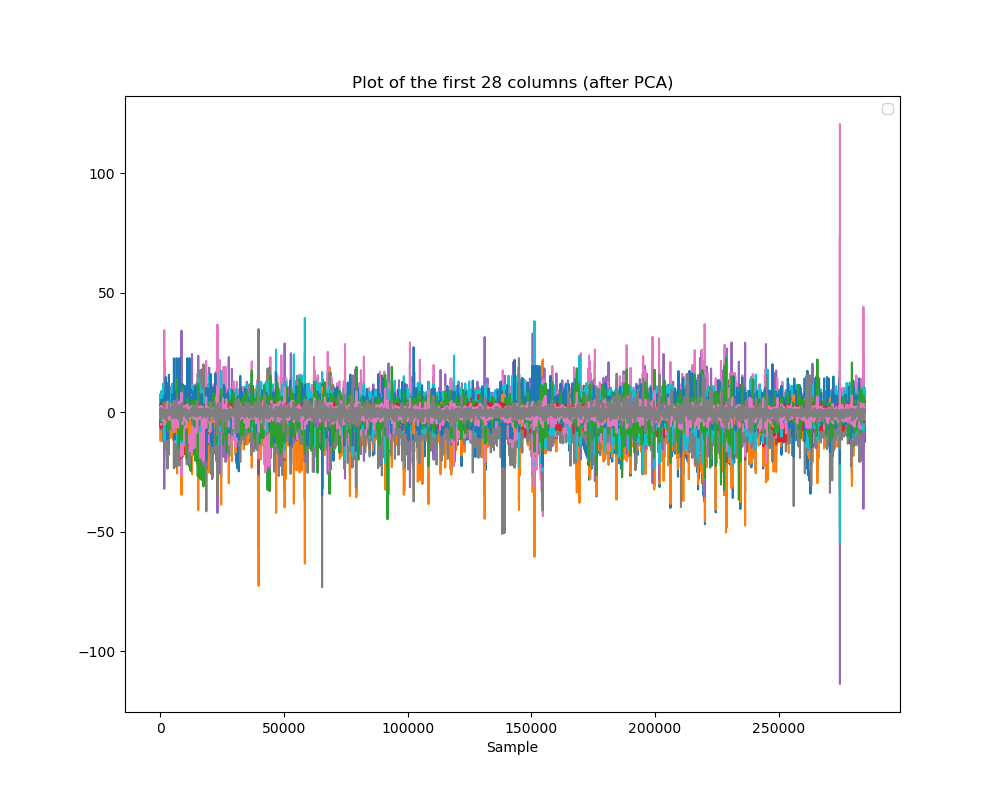

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Sample')

In [4]:
# plot the features (not amount or class)
plt.figure(figsize=(10,8))
for a in range(1, 29):
    plt.plot(data['V'+str(a)])
plt.legend(loc='best', fontsize=10, ncol=8)
plt.title("Plot of the first 28 columns (after PCA)")
plt.xlabel("Sample")

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0]


In [10]:
len(fraud)


492

In [11]:
len(normal)

284315

<IPython.core.display.Javascript object>


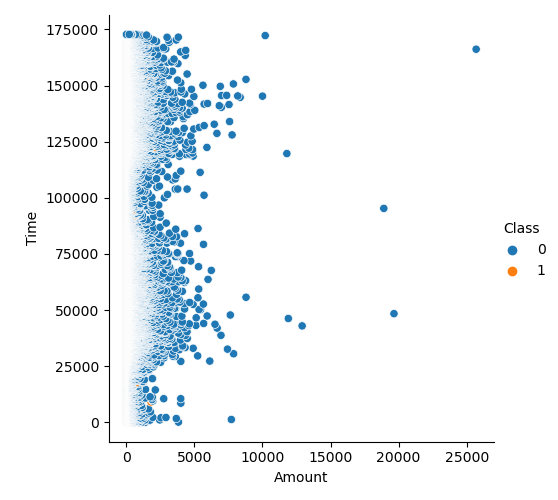

In [13]:
sns.relplot(x='Amount', y="Time",hue="Class", data=data)

In [15]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<IPython.core.display.Javascript object>


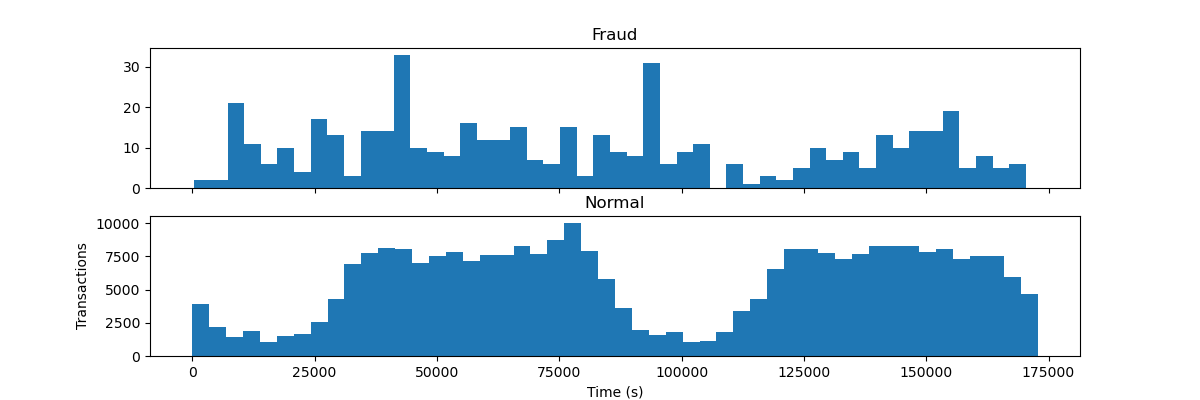

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(data.Time[data.Class == 1], bins = 50)
ax1.set_title('Fraud')
ax2.hist(data.Time[data.Class == 0], bins = 50)
ax2.set_title('Normal')
plt.xlabel('Time (s)')
plt.ylabel('Transactions')
plt.show()

<IPython.core.display.Javascript object>


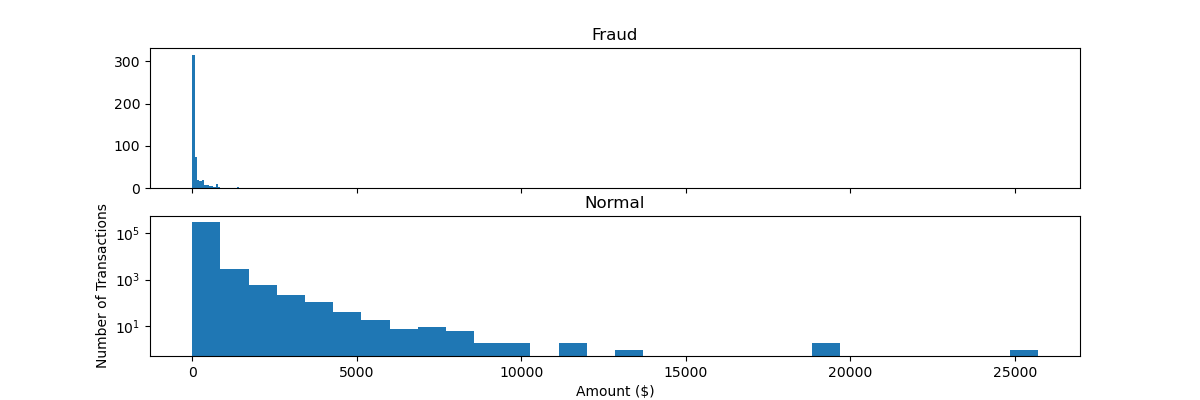

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(data.Amount[data.Class == 1], bins = 30)
ax1.set_title('Fraud')
ax2.hist(data.Amount[data.Class == 0], bins = 30)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


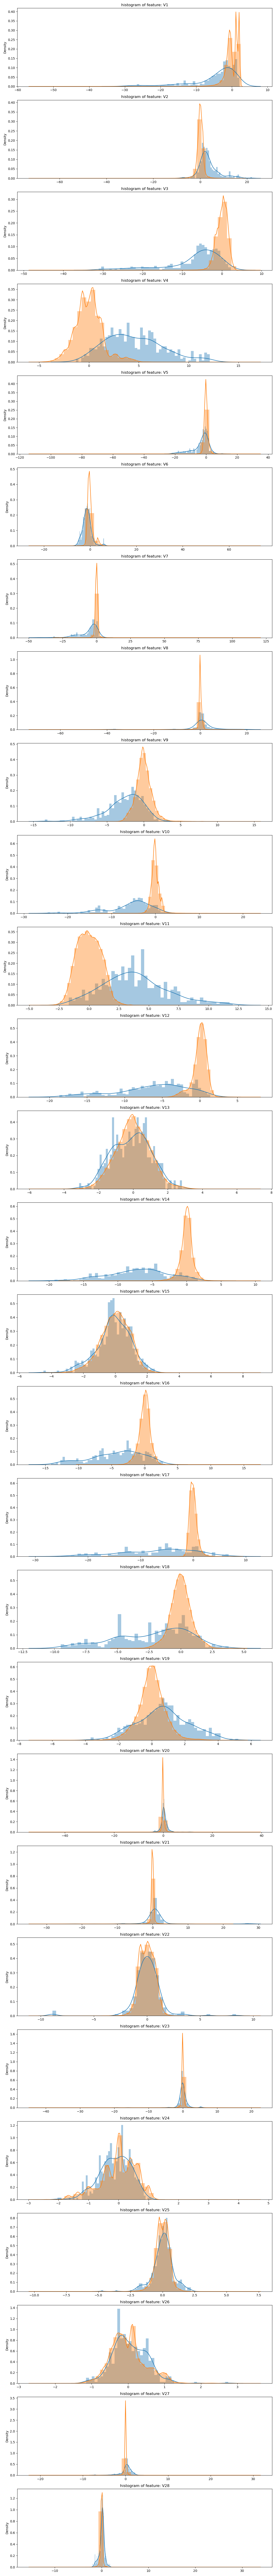

C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

In [18]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(data['V'+str(i)][data.Class == 1], bins=50)
    sns.distplot(data['V'+str(i)][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

In [19]:
clean_data = data.drop(['V28','V27','V23','V8'], axis =1)

In [20]:
#Create dataframes of only Fraud and Normal transactions. Also Shuffle them.
fraud = shuffle(data[data.Class == 1])
normal = shuffle(data[data.Class == 0])
# Produce a training set of 80% of fraudulent and 80% normal transactions
X_train = fraud.sample(frac=0.8)
X_train = pd.concat([X_train, normal.sample(frac = 0.8)], axis = 0)
# Split remainder into testing and validation
remainder = data.loc[~data.index.isin(X_train.index)]
X_test = remainder.sample(frac=0.7)
X_validation = remainder.loc[~remainder.index.isin(X_test.index)]

In [ ]:
# Resample the Training Data using ADASYN
# The test data remains imbalanced
#
#from imblearn.over_sampling import ADASYN
#ada = ADASYN()
#data_resampled, data_labels_resampled = ada.fit_sample(
#                  np.array(X_train.ix[:, X_train.columns != 'Class']), 
#                  np.array(X_train.Class))
# SLOW so will just unpickle something that was run previously
with open('pickle/train_data_resampled.pkl', 'rb') as f:
    X_train_resampled = pickle.load(f)
with open('pickle/train_data_labels_resampled.pkl', 'rb') as f:
    X_train_labels_resampled = pickle.load(f)
    
print(Counter(X_train_labels_resampled))
    
X_train_resampled = pd.DataFrame(X_train_resampled)
X_train_labels_resampled = pd.DataFrame(X_train_labels_resampled)
X_train_resampled = pd.concat([X_train_resampled, X_train_labels_resampled], axis=1)
X_train_resampled.columns = X_train.columns
X_train_resampled.head()

In [ ]:
# Linear SVM on unsampled training data
lsvm = svm.LinearSVC(C=1.0, dual=False)
lsvm.fit(dataset['X_train'], dataset['y_train'])
y_pred = lsvm.predict(dataset['X_test'])
plot_confusion_matrix(dataset['y_test'], y_pred)

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [23]:
x = data.iloc[:,: -1] 
y = data['Class']


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.35)

In [25]:
clf=linear_model.LogisticRegression(C=1e5)


In [27]:
clf.fit(x_train, y_train)

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [28]:
y_pred = np.array(clf.predict(x_test))
y = np.array(y_test)


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [30]:
print(confusion_matrix(y_test, y_pred))

[[99460    47]
 [   61   115]]


In [31]:
print(accuracy_score(y_test, y_pred))


0.9989165655126752


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       0.71      0.65      0.68       176

    accuracy                           1.00     99683
   macro avg       0.85      0.83      0.84     99683
weighted avg       1.00      1.00      1.00     99683

